In [ ]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report, roc_curve, auc
import seaborn as sns

## Importing Data

### TF-IDF

In [2]:
with open('../DATA/tfidf_data.pkl', 'rb') as f:
    data = pickle.load(f)

X_train_tfidf = data['X_train']
X_test_tfidf = data['X_test']
y_train_tfidf = data['y_train']
y_test_tfidf = data['y_test']
vectorizer_tfidf = data['vectorizer']

### Count Vectorizer

In [3]:
with open('../DATA/count_data.pkl', 'rb') as f:
    data = pickle.load(f)

X_train_count = data['X_train']
X_test_count = data['X_test']
y_train_count = data['y_train']
y_test_count = data['y_test']
vectorizer_count = data['vectorizer']

### Train Models

In [4]:
y_train_count = np.array(y_train_count)
y_test_count =  np.array(y_test_count)
y_train_tfidf = np.array(y_train_tfidf)
y_test_tfidf =  np.array(y_test_tfidf)

tfidf_perceptrons = []
count_perceptrons = []

labels = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']

# Training perceptrons
for i in range(len(labels)):
    tfidf_perceptron = Perceptron()
    tfidf_perceptron.fit(X_train_tfidf, y_train_tfidf[:, i])
    tfidf_perceptrons.append(tfidf_perceptron)

    count_perceptron = Perceptron()
    count_perceptron.fit(X_train_count, y_train_count[:, i])
    count_perceptrons.append(count_perceptron)

### Comparing Models

Label: toxic
TF-IDF Perceptron Training Accuracy: 0.9493
TF-IDF Perceptron Testing Accuracy: 0.9399
Tf-IDF Perceptron F1 Score: 0.6818 

classification report for TF-IDF toxic:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97     28859
           1       0.69      0.67      0.68      3056

    accuracy                           0.94     31915
   macro avg       0.83      0.82      0.82     31915
weighted avg       0.94      0.94      0.94     31915

Label: severe_toxic
TF-IDF Perceptron Training Accuracy: 0.9891
TF-IDF Perceptron Testing Accuracy: 0.9851
Tf-IDF Perceptron F1 Score: 0.3510 

classification report for TF-IDF severe_toxic:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     31594
           1       0.31      0.40      0.35       321

    accuracy                           0.99     31915
   macro avg       0.65      0.70      0.67     31915
weighted avg       0.99      0.99

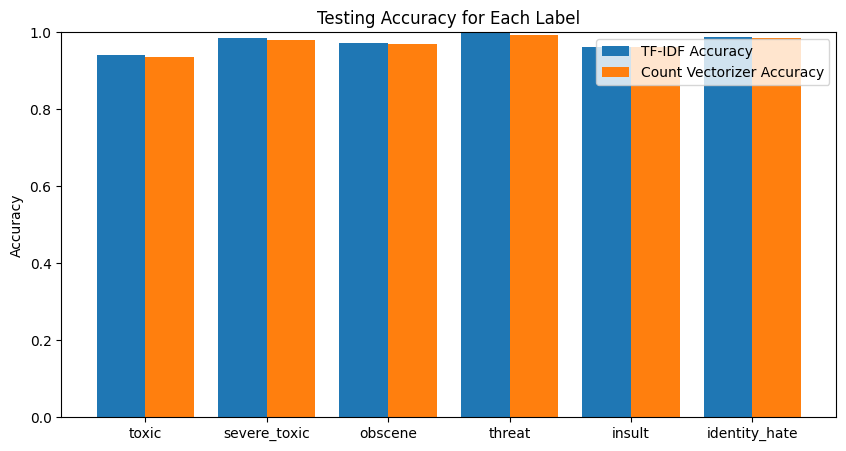

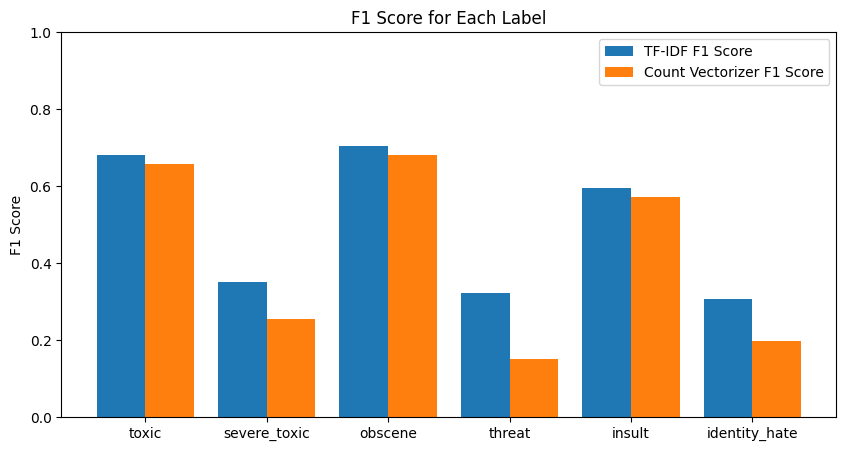

In [5]:
# Prediction matrices for each label
tfidf_preds = np.zeros_like(y_test_tfidf)
count_preds = np.zeros_like(y_test_count)

for i in range(len(labels)):
    tfidf_preds[:, i] = tfidf_perceptrons[i].predict(X_test_tfidf)
    count_preds[:, i] = count_perceptrons[i].predict(X_test_count)

# Training, testing accuracy and F1 score for each label
test_accuracies_tfidf = []
test_accuracies_count = []
f1_scores_tfidf = []
f1_scores_count = []

for i, label in enumerate(labels):
    print(f'Label: {label}')
    tfidf_train_pred = tfidf_perceptrons[i].predict(X_train_tfidf)
    tfidf_test_pred = tfidf_perceptrons[i].predict(X_test_tfidf)
    test_accuracies_tfidf.append(accuracy_score(y_test_tfidf[:, i], tfidf_test_pred))
    f1_scores_tfidf.append(f1_score(y_test_tfidf[:, i], tfidf_test_pred))
    
    print(f'TF-IDF Perceptron Training Accuracy: {accuracy_score(y_train_tfidf[:, i], tfidf_train_pred):.4f}')
    print(f'TF-IDF Perceptron Testing Accuracy: {accuracy_score(y_test_tfidf[:, i], tfidf_test_pred):.4f}')
    print(f'Tf-IDF Perceptron F1 Score: {f1_score(y_test_tfidf[:, i], tfidf_test_pred):.4f} \n')
    # classification_report(y_test_tfidf[:, i], tfidf_test_pred)
    print(f'classification report for TF-IDF {label}:\n{classification_report(y_test_tfidf[:, i], tfidf_test_pred)}')

    count_train_pred = count_perceptrons[i].predict(X_train_count)
    count_test_pred = count_perceptrons[i].predict(X_test_count)
    test_accuracies_count.append(accuracy_score(y_test_count[:, i], count_test_pred))
    f1_scores_count.append(f1_score(y_test_count[:, i], count_test_pred))
    # print(f'Count Perceptron Training Accuracy: {accuracy_score(y_train_count[:, i], count_train_pred):.4f}')
    # print(f'Count Perceptron Testing Accuracy: {accuracy_score(y_test_count[:, i], count_test_pred):.4f}')
    # print(f'Count Perceptron F1 Score: {f1_score(y_test_count[:, i], count_test_pred):.4f} \n')

# Plots for accuracy and F1 scores
x = np.arange(len(labels))

plt.figure(figsize=(10, 5))
plt.bar(x - 0.2, test_accuracies_tfidf, 0.4, label='TF-IDF Accuracy')
plt.bar(x + 0.2, test_accuracies_count, 0.4, label='Count Vectorizer Accuracy')
plt.xticks(x, labels)
plt.ylim(0, 1)
plt.ylabel('Accuracy')
plt.title('Testing Accuracy for Each Label')
plt.legend()
plt.show()


plt.figure(figsize=(10, 5))
plt.bar(x - 0.2, f1_scores_tfidf, 0.4, label='TF-IDF F1 Score')
plt.bar(x + 0.2, f1_scores_count, 0.4, label='Count Vectorizer F1 Score')
plt.xticks(x, labels)
plt.ylim(0, 1)
plt.ylabel('F1 Score')
plt.title('F1 Score for Each Label')
plt.legend()

### Evaluating Metrics

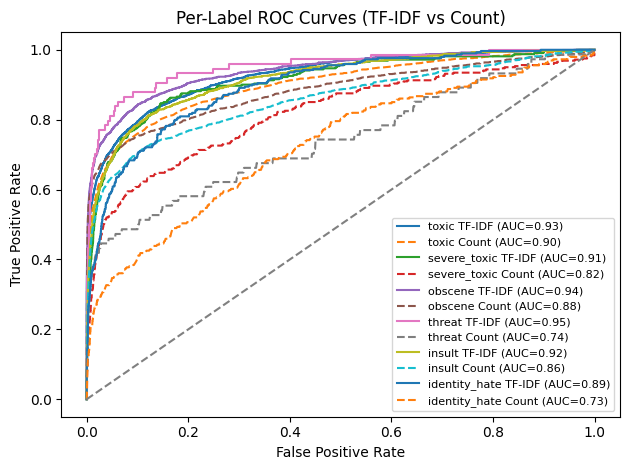

In [17]:
# ROC Curves
for i, label in enumerate(labels):
    # Decision scores
    tfidf_scores = tfidf_perceptrons[i].decision_function(X_test_tfidf)
    count_scores = count_perceptrons[i].decision_function(X_test_count)

    # ROC for TF-IDF
    fpr_tfidf, tpr_tfidf, _ = roc_curve(y_test_tfidf[:, i], tfidf_scores)
    auc_tfidf = auc(fpr_tfidf, tpr_tfidf)

    # ROC for Count
    fpr_count, tpr_count, _ = roc_curve(y_test_count[:, i], count_scores)
    auc_count = auc(fpr_count, tpr_count)

    plt.plot(fpr_tfidf, tpr_tfidf,label=f"{label} TF-IDF (AUC={auc_tfidf:.2f})")
    plt.plot(fpr_count, tpr_count, linestyle="--", label=f"{label} Count (AUC={auc_count:.2f})")

# Diagonal base line
plt.plot([0, 1], [0, 1], color="gray", linestyle="--")

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Per-Label ROC Curves (TF-IDF vs Count)")
plt.legend(fontsize=8)
plt.tight_layout()
plt.show()

In [29]:
# Weighted F1 Scores
print(f"TF-IDF Perceptron (Weighted F1): "
      f"{f1_score(y_test_tfidf, tfidf_preds, average='weighted'):.4f}")

print(f"Count Perceptron (Weighted F1):  "
      f"{f1_score(y_test_count, count_preds, average='weighted'):.4f}")

# Average Accuracy
print(f"\nTF-IDF Perceptron (Average Accuracy): "
      f"{accuracy_score(y_test_tfidf, tfidf_preds):.4f}")
print(f"Count Perceptron (Average Accuracy):  "
      f"{accuracy_score(y_test_count, count_preds):.4f}")

TF-IDF Perceptron (Weighted F1): 0.6335
Count Perceptron (Weighted F1):  0.6009

TF-IDF Perceptron (Average Accuracy): 0.8843
Count Perceptron (Average Accuracy):  0.8717


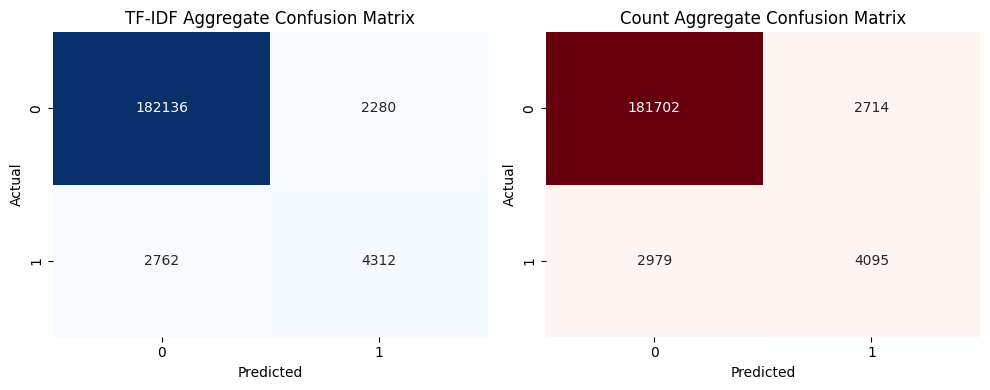

In [27]:
# Combined Confusion Matrices
tfidf_agg_cm = np.zeros((2, 2), dtype=int)
count_agg_cm = np.zeros((2, 2), dtype=int)

# Sum confusion matrices across all labels
for i in range(len(labels)):
    tfidf_agg_cm += confusion_matrix(y_test_tfidf[:, i], tfidf_preds[:, i])
    count_agg_cm += confusion_matrix(y_test_count[:, i], count_preds[:, i])

fig, axes = plt.subplots(1, 2, figsize=(10, 4))

sns.heatmap(tfidf_agg_cm, annot=True, fmt='d', cmap='Blues', cbar=False, ax=axes[0])
axes[0].set_title("TF-IDF Aggregate Confusion Matrix")
axes[0].set_xlabel("Predicted")
axes[0].set_ylabel("Actual")

sns.heatmap(count_agg_cm, annot=True, fmt='d', cmap='Reds', cbar=False, ax=axes[1])
axes[1].set_title("Count Aggregate Confusion Matrix")
axes[1].set_xlabel("Predicted")
axes[1].set_ylabel("Actual")

plt.tight_layout()
plt.show()

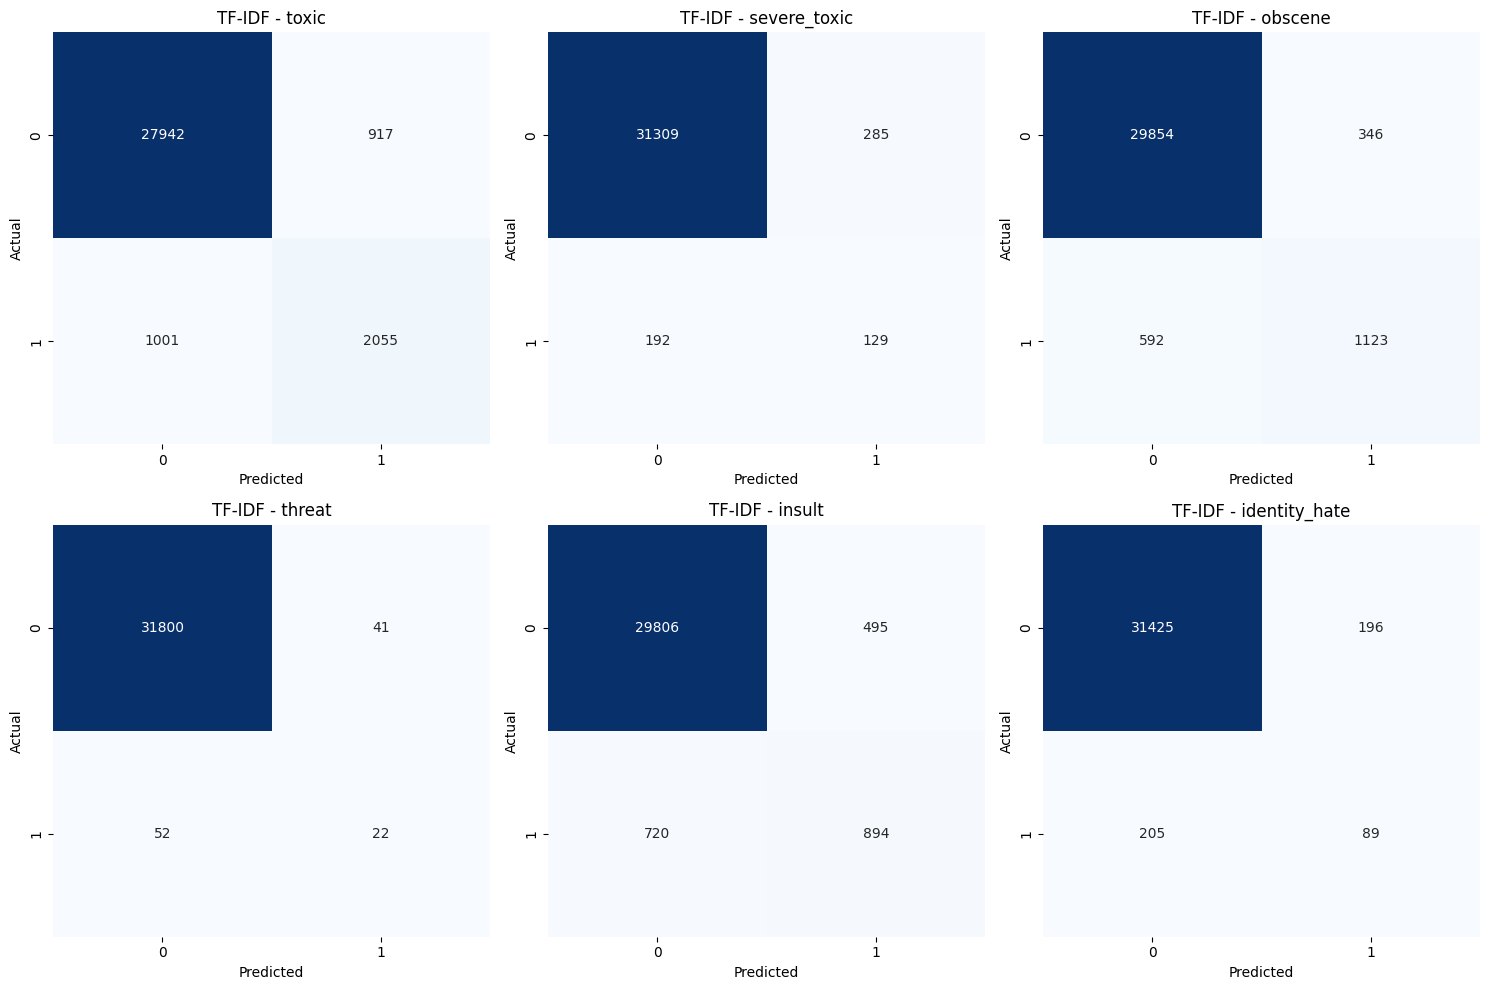

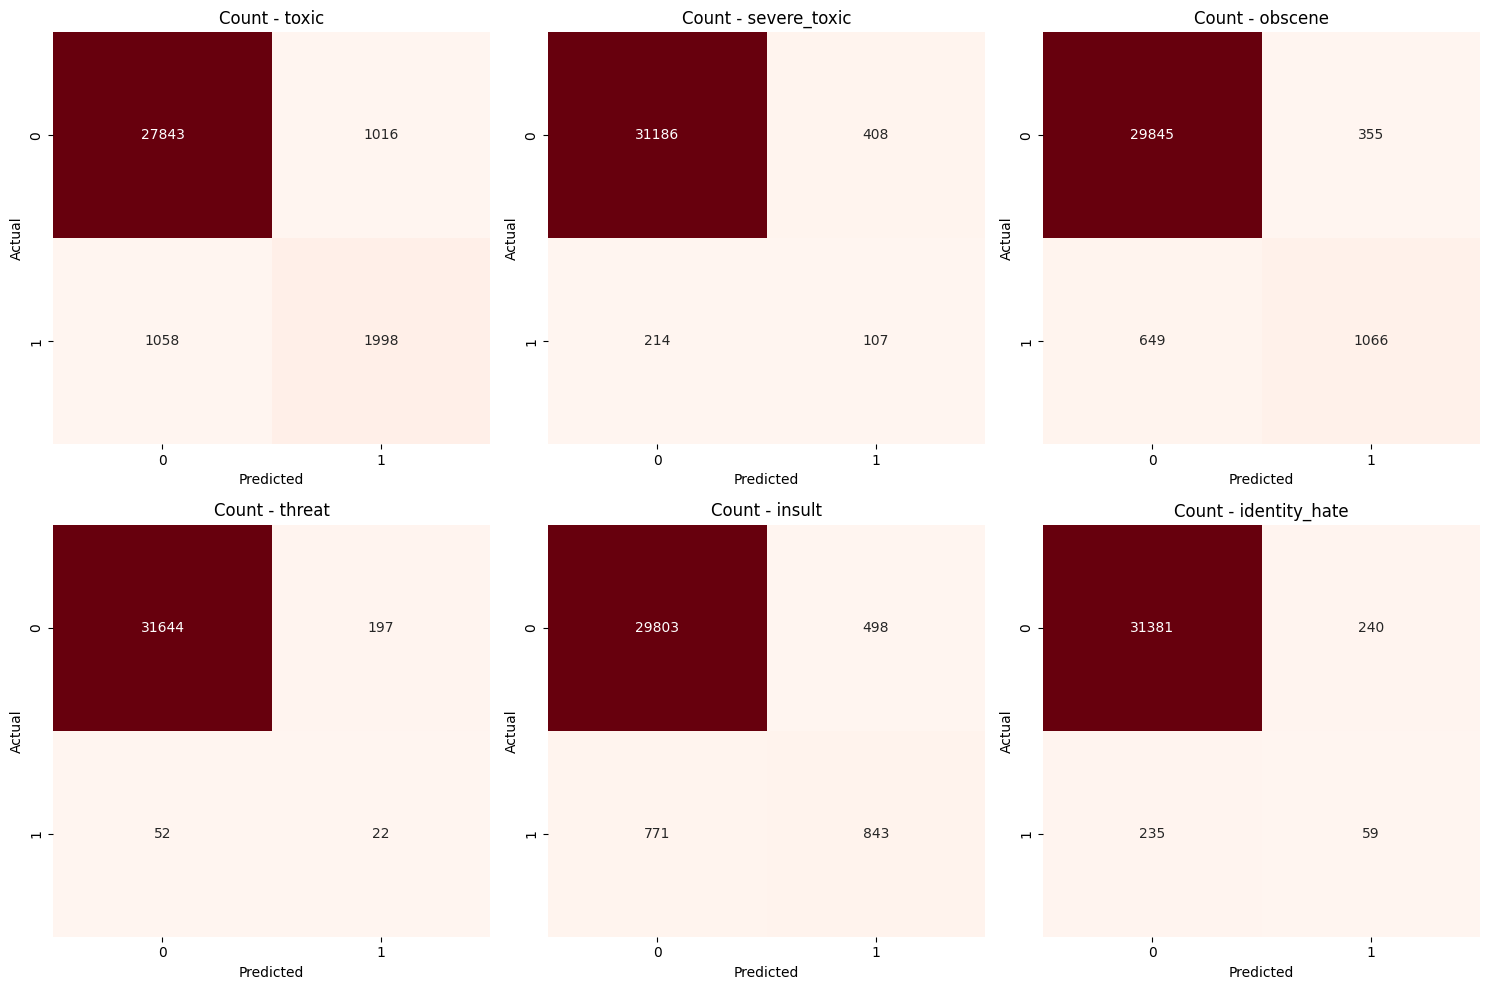

In [26]:
# Confusion Matrix for each label
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

for i, ax in enumerate(axes.flat):
    cm = confusion_matrix(y_test_tfidf[:, i], tfidf_preds[:, i])
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, ax=ax)
    ax.set_title(f"TF-IDF - {labels[i]}")
    ax.set_xlabel("Predicted")
    ax.set_ylabel("Actual")

plt.tight_layout()
plt.show()

fig, axes = plt.subplots(2, 3, figsize=(15, 10))

for i, ax in enumerate(axes.flat):
    cm = confusion_matrix(y_test_count[:, i], count_preds[:, i])
    sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', cbar=False, ax=ax)
    ax.set_title(f"Count - {labels[i]}")
    ax.set_xlabel("Predicted")
    ax.set_ylabel("Actual")

plt.tight_layout()
plt.show()